# Abstract

This project addresses the question of whether publicly available job advertisement data can be used to predict the monthly salary (as advertised in the job advertisement).

Data was harvested from the South Africa job portal www.careers24.com and used in a machine learning exercise to predict the advertised monthly salary amount. Text processing techniques (like bag-of-words) was used to derive features from the text in the job advertisement, that were used to create a machine learning model. Several machine learning algorithms were tested.

The final machine learning model was a ‘RandomForestRegressor’ (Python) and was able to predict the monthly salary with a Mean Absolute Error of 8 581 (Rands) and an $R^2$ score of 0.59. The importance's of the features used were also extracted from the machine learning model. These could be used for examining the effect of these features, which might be skills, technologies or experience, on the salary that a job candidate might be able to attain. The top 3 most important features were ‘sales’, ‘senior’, and ‘casa’ (an accounting qualification).



# Motivation

The motivation behind this report was to try to extract knowledge from the publicly available digital job advertisements, that are not accessible without some form of processing. Such analysis could have potentially been a very extensive exercise. So, as an entry point, the monthly salary from the text that was placed in the job advertisement, was predicted. The thinking was that, an understanding of content of the job advertisement text, could allow one to better understand what certain job skills might be worth in terms of salary. This could be of benefit to people like job-seekers, people changing jobs, people changing careers, etc. 

# Dataset

The dataset that was used was sourced from the South African job portal, www.careers24.com. The dataset contains a number of fields. An example of a record is shown below.

| Field | Data |
| --- | --- |
| Website | www.careers24.com |
| ID | 11657688 |
| Title | Data Analyst |
| Date Posted | 2017/04/25 |
| Date Last Seen | 2017/06/24 |
| Location 1 | Sandton |
| Location 2 | gauteng |
| Monthly Salary Lower Amount | 25000 |
| Monthly Salary Upper Amount | 30000 |
| Sector_1 | IT |
| Sector_2 | Logistics |
| Sector_3 | E-Commerce |
| Posted By | Good Personnel |
| Details | Job Details                                                                                                  |
|         | Our company is looking for a dynamic individual to join the Business Intelligence Team.                      |
|         | This person will be given an exciting opportunity to get involved in all areas of Business Intelligence      |
|         | by gathering, analyzing, interpreting data and reports and identifying trends and improvement opportunities  |
|         | for effective and efficient business management. We want a data scientist who is inquisitive, who can        |
|         | analyse data and spot trends.                                                                                |
|         | Candidate Requirements                                                                                       |
|         | A mixture of operational and advisory type experience Solid data Warehousing experience  |       
|         | Yellowfin BI tool SQL IT Degree with 3 years practical experience in data analysis and reporting  |
|         | Alternative tools/applications; Tableau, Qlik or Qlickview                                                   |
|         | This position reports to: Chief Information Officer Apply before Sunday, June 25, 2017 -                     |
|         | 16 Days left Companies may expire jobs at their own discretion. If you have not received a response          |
|         |within two weeks, your application was most likely unsuccessful.                                              |
|         | Hot Job 58 people have applied for this job. 277 people have viewed this job.                                |

This data that was extracted from www.careers24.com contained 202 675 records, starting from June 2017 to May 2018.
For this report specifically only the upper salary amount was used for building the predictive model. This was just a matter of preference. Also, the 'Details' field was used, instead of the other fields, because it contained text and it was desired to use text processing tools. Text processing would allow for the practical application in what was learned during this course and if future job advertisements are analysed, they might not have the fields as specified above.

# Data Preparation and Cleaning

The complete data set collected contained 202 675 records. All of the records were not used because some records were removed as part of the data preparation and cleaning. Records that did not contain a listed salary and salary amounts that were considered to be erroneous (entered incorrectly) were removed. For example, monthly salary amounts above 200 000 were removed. Also only jobs that could be identified as a know job type (e.g. ‘Accountant’, ‘Software Developer’, ‘Data Scientist’, etc.) were used. The amount of records used for the building of the predictive models was 20 321.
This exercise was conducted as a supervised learning exercise, hence, the listed salary was the amount to be predicted.
The texts from the job advertisements were converted into features by treating them as a bag-of-words. This means that just the appearances of a word in a text was counted and the structure of the text was ignored.
Certain repeated words and phrases were removed from the texts, because they were considered to not add any value to the model. For example "if you have not received a response within two weeks, your application was most likely unsuccessful" appeared in many texts and was removed. Stop words like ‘the’, ‘that’, ‘a’, and ‘and’ were also removed because they are considered to occur to frequently to be of use in this analysis.

# Research Question(s)

This research sought to answer the questions:
* Can the text in a job advertisment be used to predict the expected monthly salary?
* If it can be used to predict the monthly salary, to what degree is it a reliable prediction?
* Which words from the text effect the prediciton the most (do certain skills matter more)?

For this analysis the following steps were followed:
1. The job advertisements records were reduced to those that appeared to have a reliable salary amounts.
2. The remaining records were split into a training set and a test set. The test set was used to build a machine learning model to predict the monthly salary amount. The test set was not used during the building process, and was only used when the model was being tested. Care was taken to not let any data from the test set bleed into the training set.
3. The texts from the job advertisements (training set) were purged of words and phrases that were considered to not benefit this analysis. These include English stop words and commonly occurring phrases like ‘job details’, ‘apply before’, etc.
4. The text from the details of the job advertisements (training set) were tokenized, to create features (terms).
5. The importance's of the features were determined using TF-idf (Term Frequency – Inverse Document Frequency). This measure provides a statistical measure for how important a term is to a collection of documents. TF-idf is implemented in Python using sklearn.feature_extraction.TfidfVectorizer. TfidfVectorizer has several hyperparameters that effect the predictive power of the model (e.g. ‘max_df’, ‘min_df’, ‘max_features’, ‘ngram_range’). These hyperparameters were experimented with to find the best model.
6. Several machine learning algorithms (estimators) like ‘DecisionTreeRegressor’, ‘RandomForestRegressor’, ‘ElasticNet’, and ‘GradientBoostingRegressor’ were tested to see which produced the best model.
7. The predictions produced by the models were tested using three measures. These were Mean Squared Error (MSE), Mean Absolute Error (MAE) and $R^2$ score (coefficient of determination).

In [10]:
# All the libraries that will be used are imported
import pyodbc
import pandas as pd
import numpy as np
import datetime
import string
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

In [11]:
# The data that will be used is imported from a SQL databse and joined together
cnxn_1 = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};'
                        'SERVER=BLACK-CUBE\SQLEXPRESS;'
                        'DATABASE=BI_Jobs;Trusted_Connection=yes')

In [12]:
jobs_RPT_DF = pd.read_sql_query(
                    "SELECT " +
                       "[Job_Unique_ID] " +
                       # ",[Website] " +
                       # ",[Job_ID] " +
                       ",[First_Listed_Title] " +
                       # ",[Last_Listed_Title] " +
                       ",[Job_Class_1] " +
                       # ",[Job_Class_2] " +
                       # ",[Job_Type] " +
                       # ",[Job_Level] " +
                       ",[Date_First_Posted] " +
                       # ",[Date_Last_Seen] " +
                       ",[First_Listed_Locality] " +
                       ",[First_Listed_Province] " +
                       # ",[Last_Listed_Locality] " +
                       # ",[Last_Listed_Province] " +
                       # ",[MIN_Job_Salary_Lower_Amount] " +
                       # ",[MIN_Job_Salary_Upper_Amount] " +
                       # ",[AVG_Job_Salary_Lower_Amount] " +
                       # ",[AVG_Job_Salary_Upper_Amount] " +
                       # ",[MAX_Job_Salary_Lower_Amount] " +
                       ",[MAX_Job_Salary_Upper_Amount] " +
                       ",[Sector_1] " +
                       # ",[Sector_2] " +
                       # ",[Sector_3] " +
                       # ",[Sector_4] " +
                       # ",[Sector_5] " +
                       ",[Posted_by] " +
                "FROM [BI_Jobs].[RPT].[Jobs_] " +
                # "WHERE [MAX_Job_Salary_Upper_Amount] IS NOT NULL "
                "WHERE [Job_Class_1] IN " +
                    # "('Software Developer') " +
                    "('Data Scientist', 'Data Analyst', 'Sales Consultant'," +
                    "'Software Developer', 'Accountant', " +
                    "'Educator', 'Financial Manager', 'Call Centre Consultant'," +
                    "'Nurse', 'Database Administrator') "
                 # + "AND [MAX_Job_Salary_Upper_Amount] IS NOT NULL "
            , cnxn_1)

job_RPT_details_DF = pd.read_sql_query(
                        "SELECT  " +
                              "[Job_Unique_ID] " +
                              # ",[Website] " +
                              # ",[Job_ID] " +
                              ",[Details] " +
                              "FROM [BI_Jobs].[BI].[Details] "
                        , cnxn_1)


jobs_DF = jobs_RPT_DF.merge(job_RPT_details_DF, left_on="Job_Unique_ID", 
                            right_on="Job_Unique_ID")
jobs_DF = jobs_DF.drop(["Job_Unique_ID"], axis=1)

print("jobs_DF.shape :", jobs_DF)

jobs_DF.shape :                                       First_Listed_Title         Job_Class_1  \
0                                           Data Analyst        Data Analyst   
1                                          PHP Developer  Software Developer   
2                                     SAP ABAP Developer  Software Developer   
3                            Hybrid Mobile App Developer  Software Developer   
4                              Linux Automation Engineer  Software Developer   
5                           C# Developer with C++ Skills  Software Developer   
6                                           C# Developer  Software Developer   
7                                          PHP Developer  Software Developer   
8                                    Front End Developer  Software Developer   
9                                    Senior C# Developer  Software Developer   
10                                        Java Developer  Software Developer   
11                      

In [13]:
# The job titles stored in the column "Job_Class_1" are standardized below
knowClasses = ['Data Scientist', 'Data Analyst', 'Sales Consultant', 
               'Software Developer', 'Accountant',
               'Educator', 'Financial Manager', 'Nurse', 
               'Database Administrator']

def mapJobClass(classValue, knowClasses, otherValue="Other") :
    if classValue in knowClasses :
        return classValue
    else :
        return otherValue


jobs_DF["Job_Class_1"] = jobs_DF["Job_Class_1"]\
    .apply(lambda x: mapJobClass(x, knowClasses=knowClasses, otherValue="Other"))

In [14]:
print(jobs_DF.head())
print()
print(jobs_DF.dtypes)

            First_Listed_Title         Job_Class_1 Date_First_Posted  \
0                 Data Analyst        Data Analyst        2017-04-25   
1                PHP Developer  Software Developer        2017-06-10   
2           SAP ABAP Developer  Software Developer        2017-06-10   
3  Hybrid Mobile App Developer  Software Developer        2017-06-10   
4    Linux Automation Engineer  Software Developer        2017-06-10   

    First_Listed_Locality First_Listed_Province  MAX_Job_Salary_Upper_Amount  \
0                 Sandton               gauteng                      30000.0   
1  Durban Western Suburbs         kwazulu-natal                      50000.0   
2            Johannesburg               gauteng                          NaN   
3               Bellville          western-cape                      30000.0   
4               Bellville          western-cape                      40000.0   

  Sector_1              Posted_by  \
0       IT                   None   
1       IT  

In [15]:
# We specify which features are the predicted values in jobs_y
# The features to be used for prediction are stored in jobs_X
featureColumns = ["Date_First_Posted", "First_Listed_Locality", 
                  "First_Listed_Province", "Sector_1", 
                  "Posted_by", "Details"]
jobs_X = jobs_DF[featureColumns]
jobs_y = jobs_DF["MAX_Job_Salary_Upper_Amount"]

In [16]:
# The salary values (that we are trying to predict) are distrubed like this:
jobs_y.describe()

count     20321.000000
mean      51493.608484
std       62335.812843
min           5.000000
25%       31667.000000
50%       45000.000000
75%       58333.000000
max      960000.000000
Name: MAX_Job_Salary_Upper_Amount, dtype: float64

In [17]:
# We clean up the data and see how many records remain
print("Initial record count.")
print("jobs_DF.shape :", jobs_DF.shape)

jobs_DF = jobs_DF[pd.notnull(jobs_DF["MAX_Job_Salary_Upper_Amount"])]
print("After dropping NULL values in target attribute.")
print("jobs_DF.shape :", jobs_DF.shape)
jobs_DF["Date_First_Posted"] = pd.to_datetime(jobs_DF["Date_First_Posted"])


Initial record count.
jobs_DF.shape : (51156, 9)
After dropping NULL values in target attribute.
jobs_DF.shape : (20321, 9)


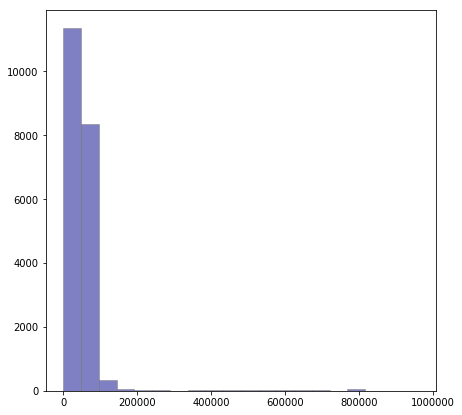

In [19]:
# The monthly salary amounts are distibuted as shown below
# There is a long tail to the right, 
# indicationg that only few jobs have a high salary
jobs_full_X = jobs_DF[featureColumns]
jobs_full_y = jobs_DF["MAX_Job_Salary_Upper_Amount"]
jobs_full_y.describe()
plt.figure(figsize=(7,7))
plt.hist(jobs_full_y.dropna(), bins=20, 
         color='darkblue', 
         edgecolor='grey', alpha=0.5)
plt.show()

In [20]:
# Values above 200 000 are considered erroneous data and are excluded
jobs_DF = jobs_DF[(0<jobs_DF["MAX_Job_Salary_Upper_Amount"]) & 
                  (jobs_DF["MAX_Job_Salary_Upper_Amount"]<200000)]
print("After excluding target values below 200 000")
print("jobs_DF.shape :", jobs_DF.shape)

After excluding target values below 200 000
jobs_DF.shape : (20059, 9)


# Findings

Histograms were used to visualize the distribution of the monthly salary amounts. These histograms were used to spot outliers, that were subsequently removed from the data set used to build the predictive model.

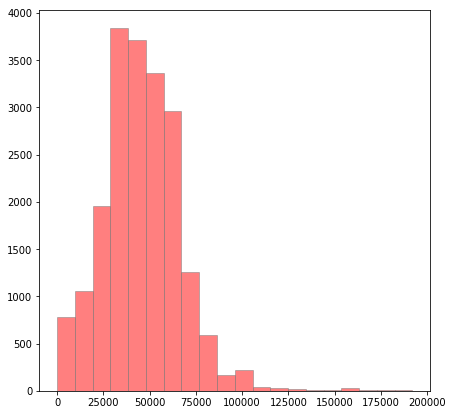

In [21]:
# The monthly salary amounts are distibuted as shown below
# There is a long tail to the right, 
# indicationg that only few jobs have a high salary
jobs_X = jobs_DF[featureColumns]
jobs_y = jobs_DF["MAX_Job_Salary_Upper_Amount"]
jobs_y.describe()
plt.figure(figsize=(7,7))
plt.hist(jobs_y, bins=20, color='red', edgecolor='grey', alpha=0.5)
plt.show()

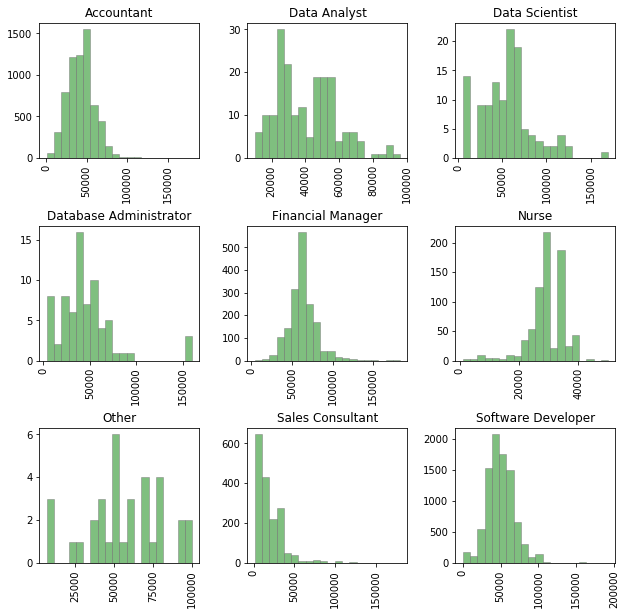

In [22]:
#plt.figure(figsize=(15,15))
jobs_DF.hist(column="MAX_Job_Salary_Upper_Amount", by="Job_Class_1", 
             bins=20, color='green', edgecolor='grey', 
             alpha=0.5, figsize=(10,10))
plt.show()

In [23]:
# Upon examining a few job advertisments, 
# it was discovered that some of the text should 
# be removed because it does not 
# seem to add any value to the analysis. 
# To do this a function is defined below.

def clean_Doc(dirty_doc, uselessWords, uselessPhrases) :
    temp_0 = dirty_doc
    temp_0 = temp_0.lower()
    for phrase in uselessPhrases :
        temp_0 = temp_0.replace(phrase, "")

    temp_1 = [char for char in temp_0 if char not in string.punctuation]
    temp_1 = ''.join(temp_1)
    temp_2 = [char for char in temp_1 if char not in string.digits]
    temp_2 = ''.join(temp_2)
    temp_3 = [word for word in temp_2.split() if word.lower() not in uselessWords]
    temp_3 = ' '.join(temp_3)
    return temp_3

In [24]:
# Also so phrases and words that are considered undesireable are defined.
uselessWords = ["cape", "town",
                "sunday", "monday", "tuesday", "wednesday", "thursday", 
                "friday", "saturday",
                "january", "february", "march", "april", "may", "june", 
                "july", "august", "september", 
                "october", "november", "december",
                "job", "jobs", "employer", "viewed",
                "eastern-cape", "free-state", "northern-cape", "kwazulu-natal", 
                "limpopo", "gauteng", 
                "mpumalanga", "north-west", "western-cape"]

uselessPhrases = ["job details",
                  "qualifications and experience",
                  "minimum requirements",
                  "candidate requirements",
                  "if you have not received a response within two weeks",
                  "your application was most likely unsuccessful",
                  "apply before",
                  "days left",
                  "companies may expire jobs at their own discretion"
                  "people have viewed this job",
                  "people have applied for this job",
                  "hot job",
                  "job details"]

In [13]:
# The data is first split into a training and test set, 
# before transformations are applied
X_train, X_test, y_train, y_test = train_test_split(jobs_X, jobs_y, 
                                                    random_state=321, 
                                                    train_size=0.80)

In [14]:
# Now the job adverisments texts are cleaned.
X_train_temp = X_train["Details"].copy()
X_train["Details_Clean"] = X_train_temp.apply(lambda x: clean_Doc(x, 
                                                                  uselessWords, 
                                                                  uselessPhrases))
docs_clean = X_train["Details_Clean"].copy()

C:\Users\Carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# A function is defined to test a few algorithms in the predcitve model.
def runExperiment(max_df_list, min_df_list, no_features, ngram_start, ngram_end) :
    resultsColumns = ["Estimator", "No_Features", "max_df", "min_df", 
                      "ngram_range", "Measure", "Value"]
    results_DF = pd.DataFrame(columns=resultsColumns)
    for max_df in max_df_list :
        for min_df in min_df_list :
            tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, 
                                               max_features=no_features,
                                                stop_words='english', 
                                               ngram_range=(ngram_start, ngram_end))

            tfidf_train = tfidf_vectorizer.fit_transform(docs_clean)
            tfidf_test = tfidf_vectorizer.transform(X_test["Details"])
            tfidf_feature_names = tfidf_vectorizer.get_feature_names()
            
            
            regressor_1 = DecisionTreeRegressor()
            model_1 = regressor_1.fit(X=tfidf_train, y=y_train)
            predictions_1 = model_1.predict(tfidf_test)
            MSE_1 = mean_squared_error(y_true=y_test, y_pred=predictions_1)
            MAE_1 = mean_absolute_error(y_true=y_test, y_pred=predictions_1)
            R2E_1 = r2_score(y_true=y_test, y_pred=predictions_1)
            result_MSE_1 = pd.DataFrame(data=np.array(["DecisionTreeRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_1]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_MAE_1 = pd.DataFrame(data=np.array(["DecisionTreeRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_1]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_R2E_1 = pd.DataFrame(data=np.array(["DecisionTreeRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_1]).reshape((1, 7)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_1)
            results_DF = results_DF.append(result_MAE_1)
            results_DF = results_DF.append(result_R2E_1)
            
            
            regressor_2 = RandomForestRegressor()
            model_2 = regressor_2.fit(X=tfidf_train, y=y_train)
            predictions_2 = model_2.predict(tfidf_test)
            MSE_2 = mean_squared_error(y_true=y_test, y_pred=predictions_2)
            MAE_2 = mean_absolute_error(y_true=y_test, y_pred=predictions_2)
            R2E_2 = r2_score(y_true=y_test, y_pred=predictions_2)
            result_MSE_2 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_2]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_MAE_2 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_2]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_R2E_2 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_2]).reshape((1, 7)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_2)
            results_DF = results_DF.append(result_MAE_2)
            results_DF = results_DF.append(result_R2E_2)


            regressor_3 = ElasticNet()
            model_3 = regressor_3.fit(X=tfidf_train, y=y_train)
            predictions_3 = model_3.predict(tfidf_test)
            MSE_3 = mean_squared_error(y_true=y_test, y_pred=predictions_3)
            MAE_3 = mean_absolute_error(y_true=y_test, y_pred=predictions_3)
            R2E_3 = r2_score(y_true=y_test, y_pred=predictions_3)
            result_MSE_3 = pd.DataFrame(data=np.array(["ElasticNet", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_3]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_MAE_3 = pd.DataFrame(data=np.array(["ElasticNet", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_3]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_R2E_3 = pd.DataFrame(data=np.array(["ElasticNet", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_3]).reshape((1, 7)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_3)
            results_DF = results_DF.append(result_MAE_3)
            results_DF = results_DF.append(result_R2E_3)
            
            
            regressor_4 = GradientBoostingRegressor()
            model_4 = regressor_4.fit(X=tfidf_train, y=y_train)
            predictions_4 = model_4.predict(tfidf_test.toarray())
            MSE_4 = mean_squared_error(y_true=y_test, y_pred=predictions_4)
            MAE_4 = mean_absolute_error(y_true=y_test, y_pred=predictions_4)
            R2E_4 = r2_score(y_true=y_test, y_pred=predictions_4)
            result_MSE_4 = pd.DataFrame(data=np.array(["GradientBoostingRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_4]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_MAE_4 = pd.DataFrame(data=np.array(["GradientBoostingRegressor", 
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_4]).reshape((1, 7)),
                                        columns=resultsColumns)
            result_R2E_4 = pd.DataFrame(data=np.array(["GradientBoostingRegressor",
                                        no_features,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_4]).reshape((1, 7)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_4)
            results_DF = results_DF.append(result_MAE_4)
            results_DF = results_DF.append(result_R2E_4)
            
    return  results_DF

In [16]:
# The experiment is now run.
no_features = 200
max_df_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_df_list = [0.05, 0.06, 0.07, 0.08, 0.09]
ngram_start = 1
ngram_end = 3

results_DF = runExperiment(max_df_list=max_df_list, 
                           min_df_list=min_df_list, 
                           no_features=no_features,
                            ngram_start=ngram_start, 
                           ngram_end=ngram_end)


In [17]:
results_DF["No_Features"] = results_DF["No_Features"].astype(np.float)
results_DF["max_df"] = results_DF["max_df"].astype(np.float)
results_DF["min_df"] = results_DF["min_df"].astype(np.float)
results_DF["Value"] = results_DF["Value"].astype(np.float)

results_DF_MSE = results_DF[results_DF["Measure"]=="MSE"]
results_DF_MSE = results_DF_MSE.reset_index(drop=True)

results_DF_MAE = results_DF[results_DF["Measure"]=="MAE"]
results_DF_MAE = results_DF_MAE.reset_index(drop=True)

results_DF_R2E = results_DF[results_DF["Measure"]=="R2E"]
results_DF_R2E = results_DF_R2E .reset_index(drop=True)

print("results_DF_MSE.head() :")
print(results_DF_MSE.head())
print("results_DF_MSE.dtypes :",results_DF_MSE.dtypes)

results_DF_MSE.head() :
                   Estimator  No_Features  max_df  min_df ngram_range Measure  \
0      DecisionTreeRegressor        200.0     0.1    0.05         1-3     MSE   
1      RandomForestRegressor        200.0     0.1    0.05         1-3     MSE   
2                 ElasticNet        200.0     0.1    0.05         1-3     MSE   
3  GradientBoostingRegressor        200.0     0.1    0.05         1-3     MSE   
4      DecisionTreeRegressor        200.0     0.1    0.06         1-3     MSE   

          Value  
0  3.797744e+08  
1  2.225662e+08  
2  4.335953e+08  
3  2.618590e+08  
4  3.975858e+08  
results_DF_MSE.dtypes : Estimator       object
No_Features    float64
max_df         float64
min_df         float64
ngram_range     object
Measure         object
Value          float64
dtype: object


The experiment tests a number of different parameters. These are used to determine optimal values for 'max_df' and 'min_df' used in the 'TfidfVectorizer' function.
'max_df' referes to the maximum document frequency for a particular term. Terms that occur above this threshold are excluded. This is can be advantageous, because words like 'job' in the job advertisment text occur very frequently.
Similarly 'min_df' is used to exclude terms that occur to infrequently.

The outcome from the experiment are measured against the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R^2 Error (R2E). The output from the experiment is visualized below.

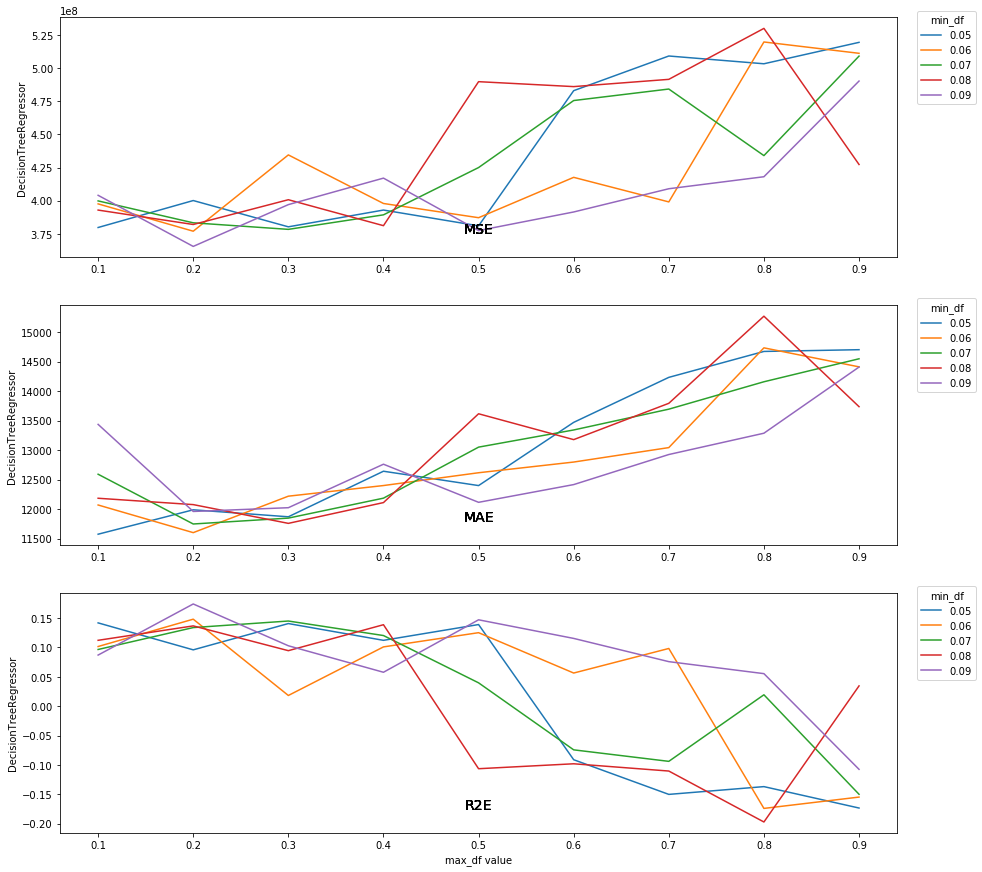

In [56]:
# The results are visualized
fig = plt.figure(figsize=(15, 15))

estimator_list = ["DecisionTreeRegressor"] 
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    # print(estimator)
    results_DF_temp = results_DF.copy()
    # print("results_DF_temp.shape :", results_DF_temp.shape)
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for min_df in min_df_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            temp_DF = temp_DF[temp_DF["min_df"]==min_df]
            sub.plot(temp_DF["max_df"], temp_DF["Value"], label=min_df)
            sub.text(0.5, 0.1, measure, 
                     fontsize=14, ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), title="min_df")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("max_df value") 
    
plt.show()
plt.close()

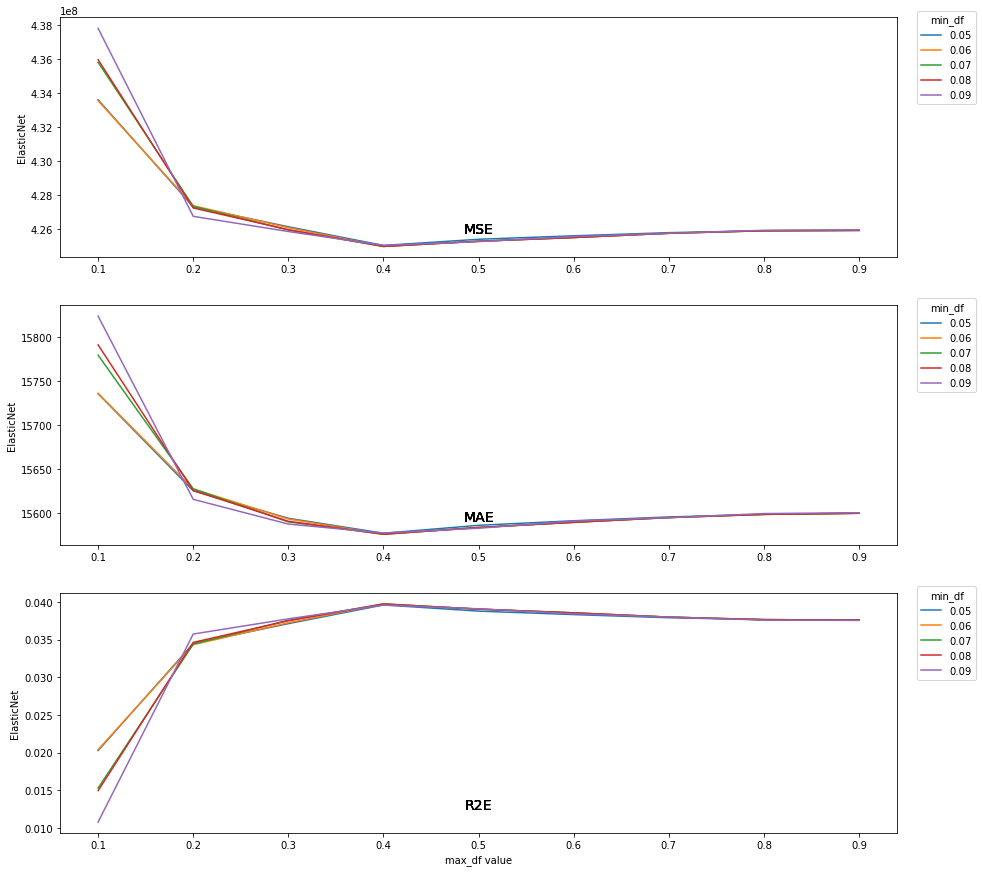

In [57]:
# The results are visualized
fig = plt.figure(figsize=(15,15))

estimator_list = ["ElasticNet"]
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    # print(estimator)
    results_DF_temp = results_DF.copy()
    # print("results_DF_temp.shape :", results_DF_temp.shape)
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for min_df in min_df_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            temp_DF = temp_DF[temp_DF["min_df"]==min_df]
            sub.plot(temp_DF["max_df"], temp_DF["Value"], label=min_df)
            sub.text(0.5, 0.1, 
                     measure, 
                     fontsize=14, ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), title="min_df")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("max_df value") 
    
plt.show()
plt.close()

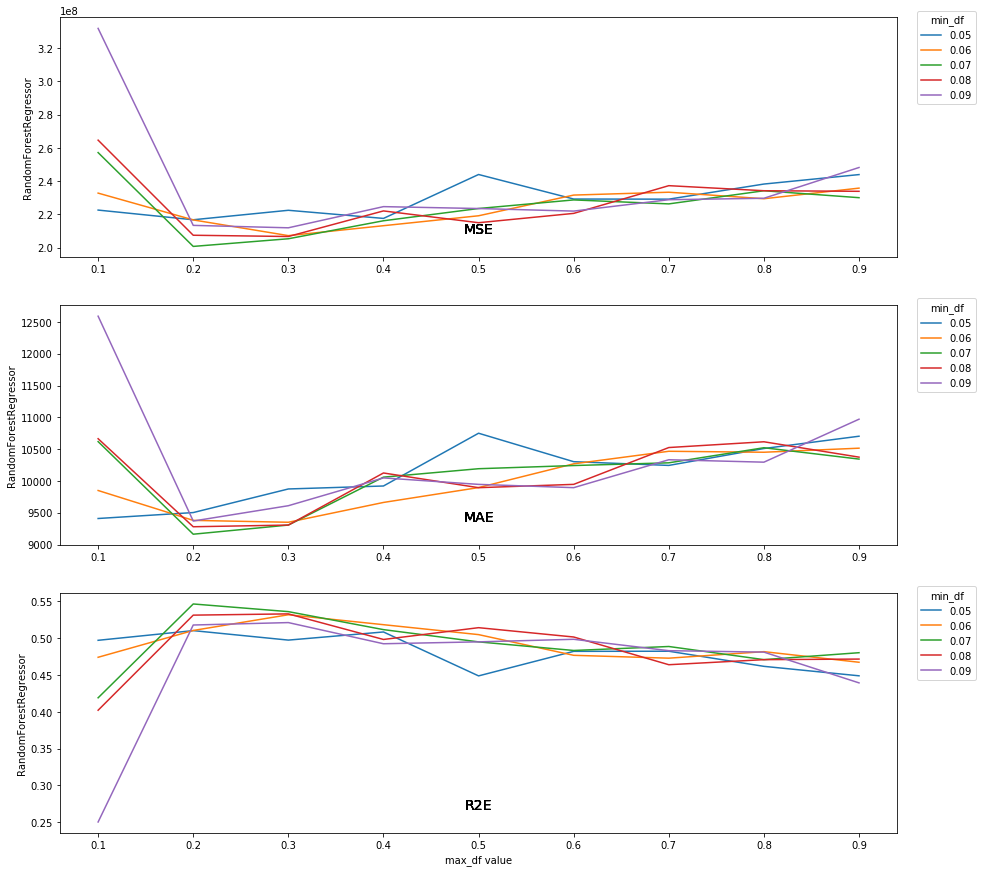

In [58]:
# The results are visualized
fig = plt.figure(figsize=(15,15))
# fig = plt.figure(figsize=(15,25))

estimator_list = ["RandomForestRegressor"]
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    # print(estimator)
    results_DF_temp = results_DF.copy()
    # print("results_DF_temp.shape :", results_DF_temp.shape)
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for min_df in min_df_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            temp_DF = temp_DF[temp_DF["min_df"]==min_df]
            sub.plot(temp_DF["max_df"], temp_DF["Value"], label=min_df)
            sub.text(0.5, 0.1, 
                     measure, 
                     fontsize=14, 
                     ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), title="min_df")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("max_df value") 
    
plt.show()
plt.close()

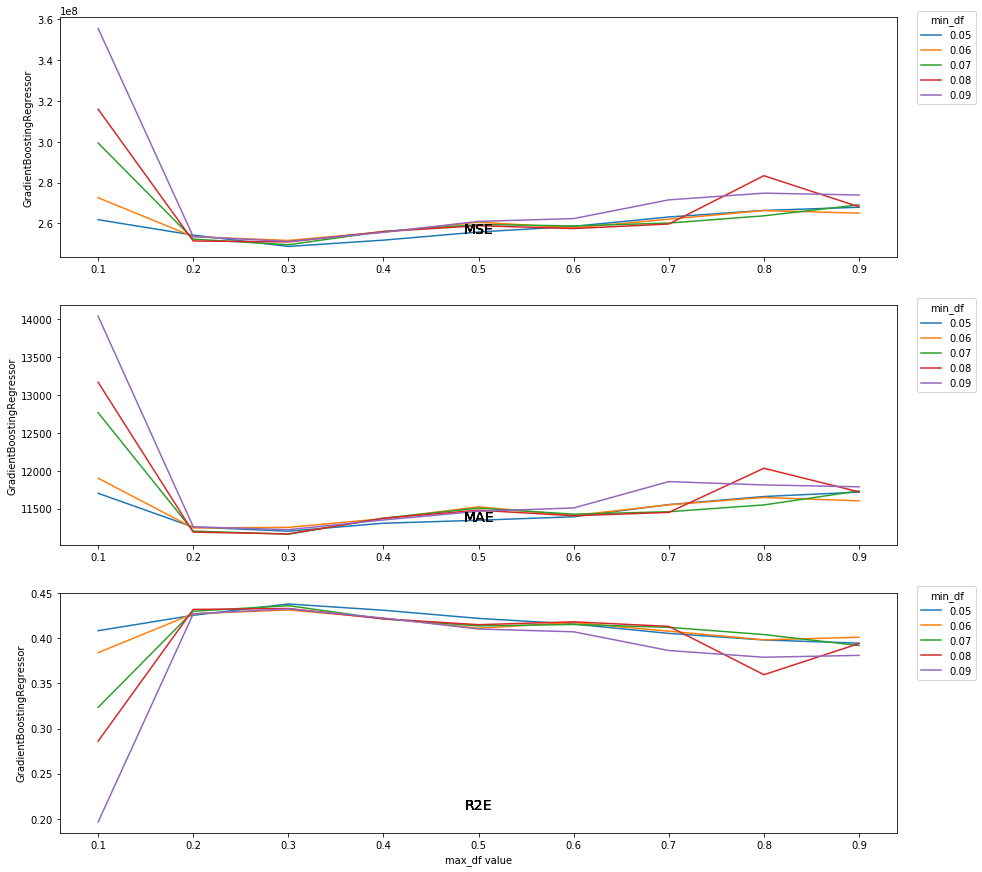

In [59]:
# The results are visualized
fig = plt.figure(figsize=(15,15))

estimator_list = ["GradientBoostingRegressor"] # 
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    # print(estimator)
    results_DF_temp = results_DF.copy()
    # print("results_DF_temp.shape :", results_DF_temp.shape)
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for min_df in min_df_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            temp_DF = temp_DF[temp_DF["min_df"]==min_df]
            sub.plot(temp_DF["max_df"], temp_DF["Value"], label=min_df)
            sub.text(0.5, 0.1, 
                     measure, 
                     fontsize=14, 
                     ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), title="min_df")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("max_df value") 
    
plt.show()
plt.close()

Examining the output from the experiment, we consider the MSE (Mean Squared Error), MAE (Mean Absolute Error), and R2E (R^2 Error). For the MSE and MAE values, a lower value is more desirable than a lower value. For the R2E value the higher the value the better. The R2E value can be up to 1.0 and indicates how much of what is happening in ghte data is explained by the model. The closer to 1.0 this value gets, the better the model can be thought of as.
Looking at the MSE, MAE, and R2E values for the three modesl constucted, we see that the 'RandomFOrestRegressor' has the highest value for the R2E (about 0.55). This occurs t a 'max_df value' of 0.3 ('min_df' value of 0.09 or 0.06) also has the lowest MSE and MAE values of all three models.
This experiment was run with three different regressor, all three rgressors were run usin the default values. The 'RandomForestRegressor' appeared to be the most promising, so it was choosen for further experimentations. I wished to explore if a better model could be built by changing the hyper-parameters of the 'RandomFOrestRegressor'.
It should be noted that, the other two regressors might out perform the 'RandomForestRegressor' if the default parameters are changed, but as an entry point 'RandomForestRegressor' was choosen.

In [25]:
# A function is defined to explore the potential of 
# a model based on the 'RandomForestRegressor'

def testEnsembleRegressors(max_df, min_df, no_features_list, 
                           no_estimators_list, ngram_start, ngram_end) :
    resultsColumns = ["Estimator", "No_Features", 
                      "No_Estimators", "max_df", 
                      "min_df", "ngram_range", 
                      "Measure", "Value"]
    results_DF = pd.DataFrame(columns=resultsColumns)
    for no_features in no_features_list :
        tfidf_vectorizer = TfidfVectorizer(max_df=max_df, 
                                min_df=min_df, 
                                max_features=no_features,
                                stop_words='english', 
                                ngram_range=(ngram_start, ngram_end))

        tfidf_train = tfidf_vectorizer.fit_transform(docs_clean)
        tfidf_test = tfidf_vectorizer.transform(X_test["Details"])
        tfidf_feature_names = tfidf_vectorizer.get_feature_names()

        for no_estimators in no_estimators_list :
            regressor_1 = RandomForestRegressor(n_estimators=no_estimators, 
                                                max_features='auto')
            model_1 = regressor_1.fit(X=tfidf_train, y=y_train)
            predictions_1 = model_1.predict(tfidf_test)
            MSE_1 = mean_squared_error(y_true=y_test, y_pred=predictions_1)
            MAE_1 = mean_absolute_error(y_true=y_test, y_pred=predictions_1)
            R2E_1 = r2_score(y_true=y_test, y_pred=predictions_1)
            result_MSE_1 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_1]).reshape((1, 8)),
                                                columns=resultsColumns)
            result_MAE_1 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_1]).reshape((1, 8)),
                                        columns=resultsColumns)
            result_R2E_1 = pd.DataFrame(data=np.array(["RandomForestRegressor", 
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_1]).reshape((1, 8)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_1)
            results_DF = results_DF.append(result_MAE_1)
            results_DF = results_DF.append(result_R2E_1)
    
    
            regressor_2 = GradientBoostingRegressor(n_estimators=no_estimators)
            model_2 = regressor_2.fit(X=tfidf_train, y=y_train)
            predictions_2 = model_2.predict(tfidf_test.toarray())
            MSE_2 = mean_squared_error(y_true=y_test, y_pred=predictions_2)
            MAE_2 = mean_absolute_error(y_true=y_test, y_pred=predictions_2)
            R2E_2 = r2_score(y_true=y_test, y_pred=predictions_2)
            result_MSE_2 = pd.DataFrame(data=np.array(["GradientBoostingRegressor", 
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MSE", MSE_2]).reshape((1, 8)),
                                        columns=resultsColumns)
            result_MAE_2 = pd.DataFrame(data=np.array(["GradientBoostingRegressor", 
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "MAE", MAE_2]).reshape((1, 8)),
                                        columns=resultsColumns)
            result_R2E_2 = pd.DataFrame(data=np.array(["GradientBoostingRegressor",
                                        no_features, no_estimators,
                                        max_df, min_df,
                                        str(ngram_start) + "-" + str(ngram_end),
                                        "R2E", R2E_2]).reshape((1, 8)),
                                        columns=resultsColumns)

            results_DF = results_DF.append(result_MSE_2)
            results_DF = results_DF.append(result_MAE_2)
            results_DF = results_DF.append(result_R2E_2)
            
    return results_DF

In [26]:
# The experiment is now run.
# Approximate run time (15:20 - )
no_features_list = [500, 1000, 1500, 2000]
no_estimators_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] 

max_df = 0.3
min_df = 0.09
ngram_start = 1
ngram_end = 3

results_DF_2 = testEnsembleRegressors(max_df=max_df, min_df=min_df, 
                                no_features_list=no_features_list,
                                no_estimators_list=no_estimators_list,
                                ngram_start=ngram_start, ngram_end=ngram_end)

results_DF_2["No_Features"] = results_DF_2["No_Features"].astype(np.float)
results_DF_2["No_Estimators"] = results_DF_2["No_Estimators"].astype(np.float)
results_DF_2["max_df"] = results_DF_2["max_df"].astype(np.float)
results_DF_2["min_df"] = results_DF_2["min_df"].astype(np.float)
results_DF_2["Value"] = results_DF_2["Value"].astype(np.float)

In [27]:
print("results_DF_2.head() :")
print(results_DF_2.head())

results_DF_2.head() :
                   Estimator  No_Features  No_Estimators  max_df  min_df  \
0      RandomForestRegressor        500.0           50.0     0.3    0.09   
0      RandomForestRegressor        500.0           50.0     0.3    0.09   
0      RandomForestRegressor        500.0           50.0     0.3    0.09   
0  GradientBoostingRegressor        500.0           50.0     0.3    0.09   
0  GradientBoostingRegressor        500.0           50.0     0.3    0.09   

  ngram_range Measure         Value  
0         1-3     MSE  1.829162e+08  
0         1-3     MAE  8.676255e+03  
0         1-3     R2E  5.866951e-01  
0         1-3     MSE  2.687829e+08  
0         1-3     MAE  1.172261e+04  


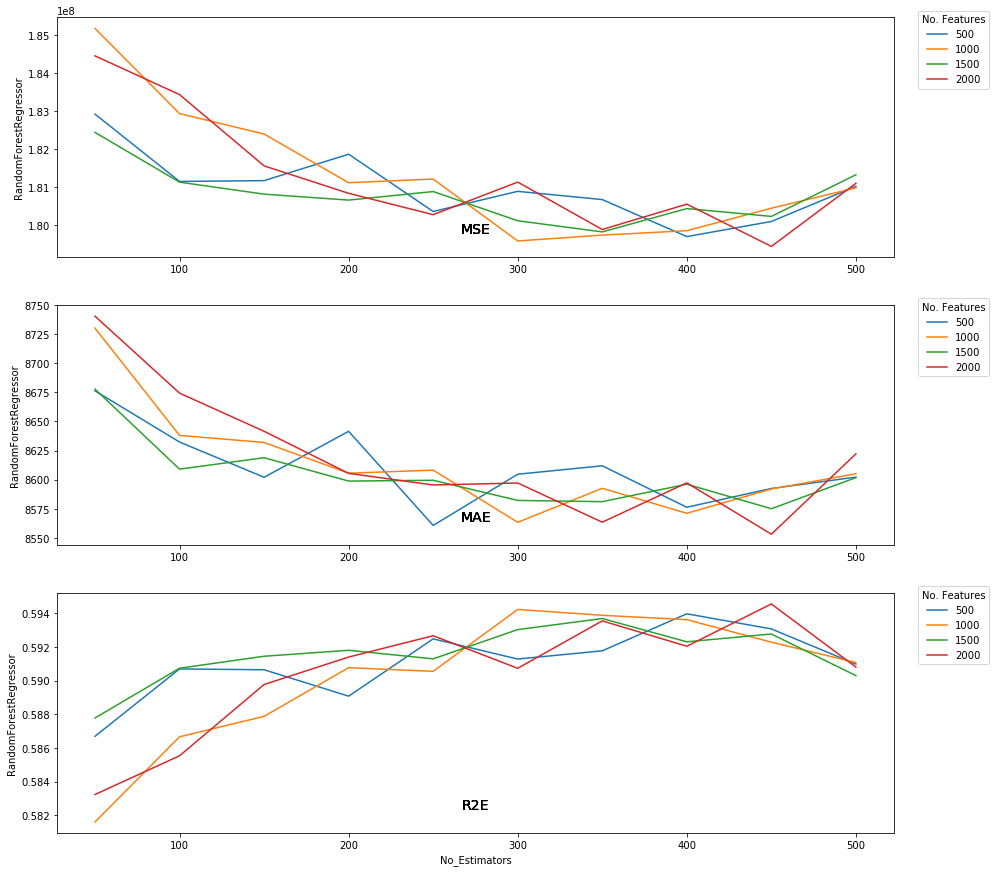

In [69]:
fig = plt.figure(figsize=(15,15))

estimator_list = ["RandomForestRegressor"]
measure_list = ["MSE", "MAE", "R2E"]
no_features_list = [500, 1000, 1500, 2000]
no_estimators_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] 
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    results_DF_temp = results_DF_2.copy()
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    # print("temp_DF_0.head(5) :", temp_DF_0)
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for no_features in no_features_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            #print("temp_DF.head() :", temp_DF.head())
            temp_DF = temp_DF[temp_DF["No_Features"]==no_features]
            # print("no_features :", no_features)
            # print("temp_DF.head() :", temp_DF.head())
            sub.plot(temp_DF["No_Estimators"], temp_DF["Value"], 
                     label=no_features)
            sub.text(0.5, 0.1, measure, fontsize=14, 
                     ha="center", transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.12, 1.05), title="No. Features")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("No_Estimators") 
    
plt.show()
plt.close()

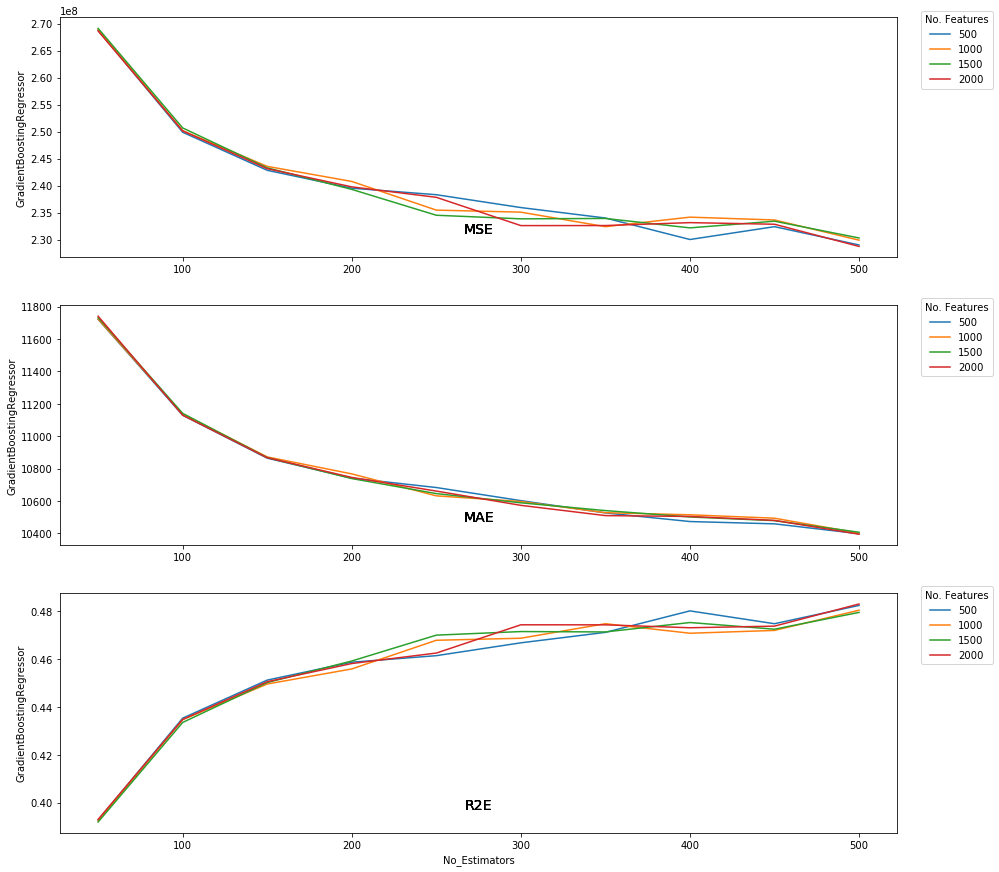

In [70]:
fig = plt.figure(figsize=(15,15))

estimator_list = ["GradientBoostingRegressor"] 
measure_list = ["MSE", "MAE", "R2E"]
no_features_list = [500, 1000, 1500, 2000]
no_estimators_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] 
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    results_DF_temp = results_DF_2.copy()
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    # print("temp_DF_0.head(5) :", temp_DF_0)
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for no_features in no_features_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            #print("temp_DF.head() :", temp_DF.head())
            temp_DF = temp_DF[temp_DF["No_Features"]==no_features]
            # print("no_features :", no_features)
            # print("temp_DF.head() :", temp_DF.head())
            sub.plot(temp_DF["No_Estimators"], 
                     temp_DF["Value"], 
                     label=no_features)
            sub.text(0.5, 0.1, measure, fontsize=14, 
                     ha="center", transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.12, 1.05), 
                   title="No. Features")
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("No_Estimators") 
    
plt.show()
plt.close()

In [32]:
# An additional experiment is now run.
no_features_list = [500]
no_estimators_list = [500, 1000, 1500, 2000, 2500, 3000, 3500] 

max_df = 0.3
min_df = 0.09
ngram_start = 1
ngram_end = 3

results_DF_3 = testEnsembleRegressors(max_df=max_df, min_df=min_df, 
                                      no_features_list=no_features_list,
                                 no_estimators_list=no_estimators_list,
                                    ngram_start=ngram_start, ngram_end=ngram_end)

results_DF_3["No_Features"] = results_DF_3["No_Features"].astype(np.float)
results_DF_3["No_Estimators"] = results_DF_3["No_Estimators"].astype(np.float)
results_DF_3["max_df"] = results_DF_3["max_df"].astype(np.float)
results_DF_3["min_df"] = results_DF_3["min_df"].astype(np.float)
results_DF_3["Value"] = results_DF_3["Value"].astype(np.float)

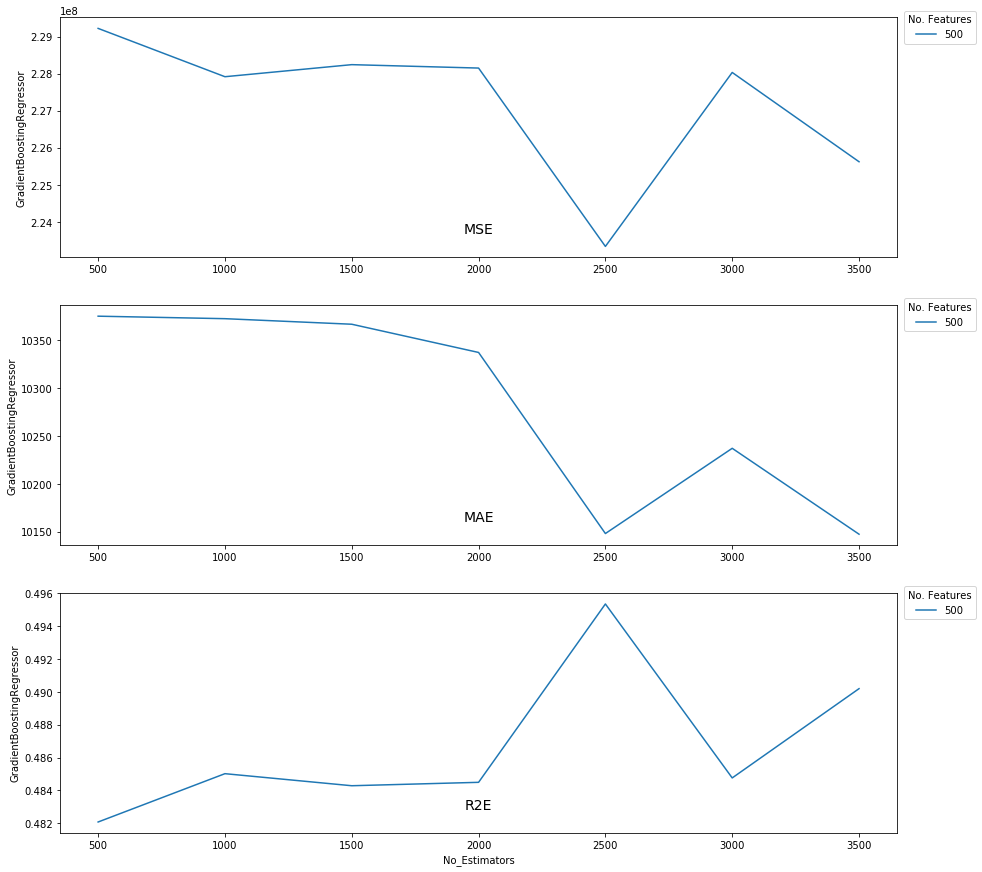

In [67]:
fig = plt.figure(figsize=(15,15))
no_features_list = [500]
no_estimators_list = [500, 1000, 1500, 2000, 2500, 3000, 3500] 

estimator_list = ["GradientBoostingRegressor"] 
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    results_DF_temp = results_DF_3.copy()
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    # print("temp_DF_0.head(5) :", temp_DF_0)
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for no_features in no_features_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            #print("temp_DF.head() :", temp_DF.head())
            temp_DF = temp_DF[temp_DF["No_Features"]==no_features]
            # print("no_features :", no_features)
            # print("temp_DF.head() :", temp_DF.head())
            sub.plot(temp_DF["No_Estimators"], 
                     temp_DF["Value"], 
                     label=no_features)
            sub.text(0.5, 0.1, measure, 
                     fontsize=14, 
                     ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), 
                   title="No. Features", 
                   labels=no_features_list)
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("No_Estimators") 
    
plt.show()
plt.close()

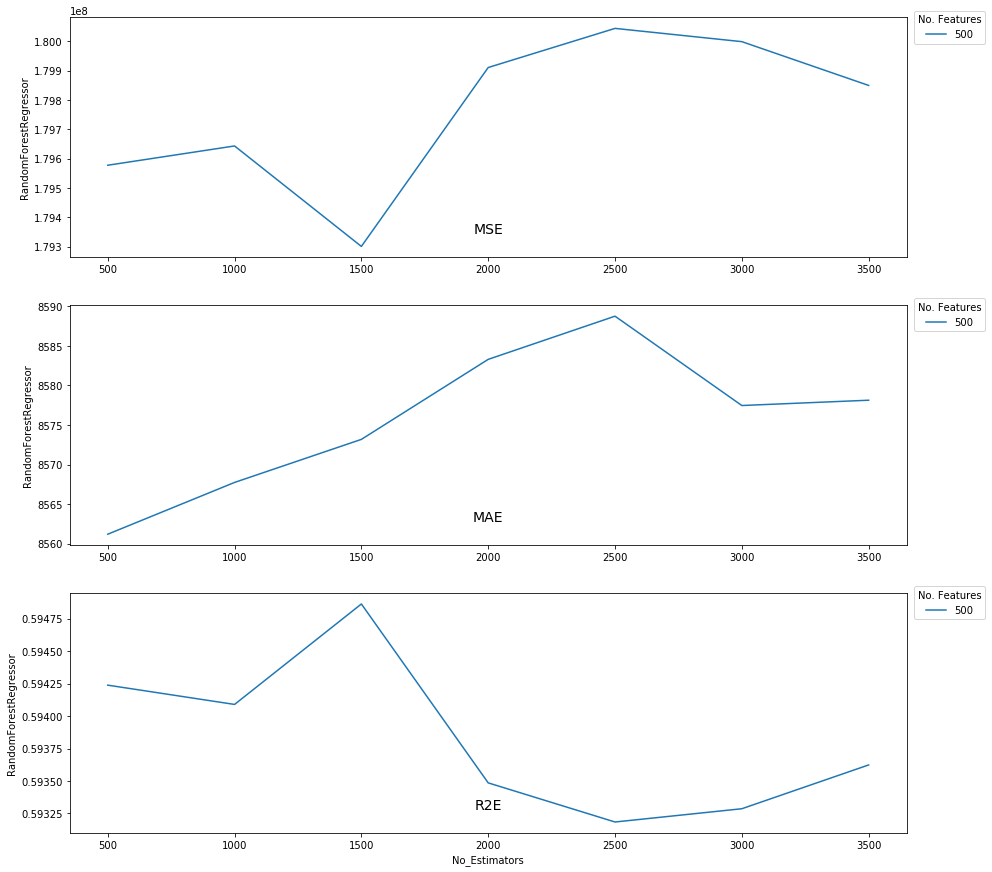

In [68]:
fig = plt.figure(figsize=(15,15))
no_features_list = [500]
no_estimators_list = [500, 1000, 1500, 2000, 2500, 3000, 3500] 

estimator_list = ["RandomForestRegressor"]
measure_list = ["MSE", "MAE", "R2E"]
i = 1

for estimator in estimator_list :
    no_plots = len(estimator_list) * len(measure_list)
    results_DF_temp = results_DF_3.copy()
    temp_DF_0 = results_DF_temp[results_DF_temp["Estimator"]==estimator]
    # print("temp_DF_0.head(5) :", temp_DF_0)
    for measure in measure_list :
        sub = fig.add_subplot(no_plots, 1, i)
        for no_features in no_features_list :
            temp_DF = temp_DF_0[temp_DF_0["Measure"]==measure]
            #print("temp_DF.head() :", temp_DF.head())
            temp_DF = temp_DF[temp_DF["No_Features"]==no_features]
            # print("no_features :", no_features)
            # print("temp_DF.head() :", temp_DF.head())
            sub.plot(temp_DF["No_Estimators"], 
                     temp_DF["Value"], 
                     label=no_features)
            sub.text(0.5, 0.1, measure, fontsize=14, 
                     ha="center", 
                     transform=sub.transAxes)
        # sub.set_title(measure)
        
        sub.legend(bbox_to_anchor=(1.1, 1.05), 
                   title="No. Features", 
                   labels=no_features_list)
        i = i + 1
        
        sub.set_ylabel(estimator) 
sub.set_xlabel("No_Estimators") 
    
plt.show()
plt.close()

In [35]:
# The values at No_Estimators=3000 is
print(results_DF_3[results_DF_3["No_Estimators"]==3000])

                   Estimator  No_Features  No_Estimators  max_df  min_df  \
0      RandomForestRegressor        500.0         3000.0     0.3    0.09   
0      RandomForestRegressor        500.0         3000.0     0.3    0.09   
0      RandomForestRegressor        500.0         3000.0     0.3    0.09   
0  GradientBoostingRegressor        500.0         3000.0     0.3    0.09   
0  GradientBoostingRegressor        500.0         3000.0     0.3    0.09   
0  GradientBoostingRegressor        500.0         3000.0     0.3    0.09   

  ngram_range Measure         Value  
0         1-3     MSE  1.799993e+08  
0         1-3     MAE  8.577463e+03  
0         1-3     R2E  5.932859e-01  
0         1-3     MSE  2.280315e+08  
0         1-3     MAE  1.023704e+04  
0         1-3     R2E  4.847555e-01  


In [36]:
# The final model is built
tfidf_vectorizer_final = TfidfVectorizer(max_df=0.3, 
                                         min_df=0.09, 
                                         max_features=500,
                                         stop_words='english', 
                                         ngram_range=(1, 3))

tfidf_train_final = tfidf_vectorizer_final.fit_transform(docs_clean)
tfidf_test_final = tfidf_vectorizer_final.transform(X_test["Details"])
tfidf_feature_names_final = tfidf_vectorizer_final.get_feature_names()
            
regressor_final = RandomForestRegressor(n_estimators=3000)
model_final = regressor_final.fit(X=tfidf_train_final, y=y_train)
predictions_final = model_final.predict(tfidf_test_final)

In [37]:
MSE_final = mean_squared_error(y_true=y_test, y_pred=predictions_final)
MAE_final = mean_absolute_error(y_true=y_test, y_pred=predictions_final)
R2_final = r2_score(y_true=y_test, y_pred=predictions_final)

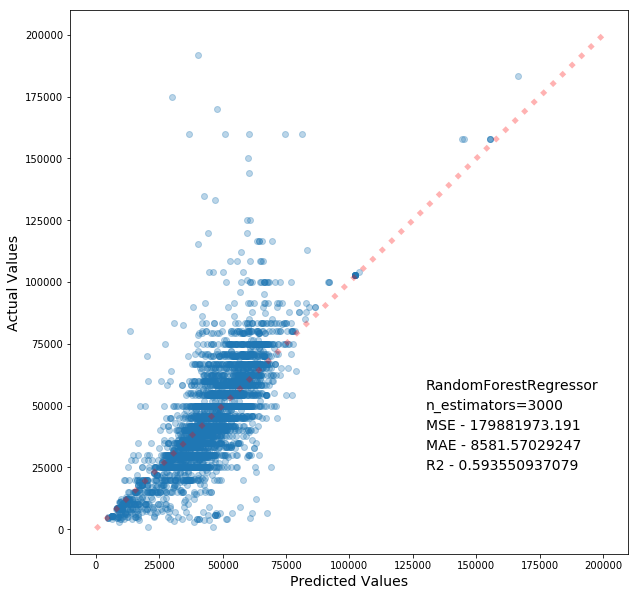

In [50]:
# The model predictions are compaired to the know test values
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(1, 1, 1)
sub.scatter(x=predictions_final, y=y_test, alpha=0.3)
sub.plot([0,200000],[0,200000], color='r', alpha=0.3, linestyle=':', linewidth=5)
sub.set_xlabel("Predicted Values", fontSize=14)
sub.set_ylabel("Actual Values", fontSize=14)
sub.annotate('RandomForestRegressor', xy=(8, 16), 
             textcoords='offset points', xytext=(330, 140), fontsize=14)
sub.annotate('n_estimators=3000', xy=(8, 16), 
             textcoords='offset points', xytext=(330, 120), fontsize=14)
sub.annotate('MSE - ' + str(MSE_final), xy=(8, 16), 
             textcoords='offset points', xytext=(330, 100), fontsize=14)
sub.annotate('MAE - ' + str(MAE_final), xy=(8, 16), 
             textcoords='offset points', xytext=(330, 80), fontsize=14)
sub.annotate('R2 - ' + str(R2_final), xy=(8, 16), 
             textcoords='offset points', xytext=(330, 60), fontsize=14)
# sub.set_title("Actual Vs. Predicted Values - Final Model", fontSize=20)
plt.show()

## Findings – Final Model
* The final predictive model’s performance is shown in the diagram.
* The model was based on the ‘RandomForestRegressor’ estimator in Python.
* The model achieved a $R^2$ value of 0.59. This indicates that the model could account for 59% of the variance in the data, when tested against unseen data.
* Points near the dotted diagonal line in the graph indicates predictions that were close to the actual value.
* There is a dense cluster of predictions around the dotted line below 75 000, indicating close predictions. However, there are some predictions that are far from the dotted line.

In [39]:
# The feature importance of the terms are ranked
featureImportances_final = pd.Series(data=model_final.feature_importances_,
                                     index=tfidf_feature_names_final)
featureImportances_final.sort_values(ascending=False,inplace=True)

predictions_compaired_final = pd.DataFrame({"Test_Value" : y_test, 
                                            "Prediction" : predictions_final})
# print()
# print("predictions_compaired_final.head(20)")
# print(predictions_compaired_final.head(20))
print()
print("Feature importances :")
print(featureImportances_final.head(25))


Feature importances :
sales                0.131364
senior               0.036981
casa                 0.033057
financial manager    0.029997
accounting           0.020190
technical            0.015412
sa                   0.014121
related financial    0.013797
java                 0.013789
international        0.012082
manager              0.011323
group                0.010902
exposure             0.010621
salary               0.010402
related senior       0.010145
permanent            0.010068
net                  0.009812
client               0.009534
sandton              0.009429
working              0.008983
project              0.008881
html css             0.008673
data                 0.008381
sql                  0.008215
business             0.007742
dtype: float64


# Limitations
This analysis was based on the online job advertisements posted on www.careers24.com. This is publicly available data mostly containing jobs for the country of South Africa. Therefore, any conclusions drawn were limited to this specific data source for South African jobs only. Also, the job advertisements were not strictly curated, that means that the content of the job advertisement was not guaranteed to be factual. Since posters were mostly free to post a job advertisement in the way they like, misrepresentation of the actual job as well as the monthly salary might have occured. 

This analysis was conducted taking all of this into account.

# Conclusions
The conclusions are summarized according to the research questions.
### Can the words listed in a job advertisement be used to predict the expected monthly salary?
The job advertisement text could, indeed, be used to predict the expected monthly salary. A predictive model based on the ‘RandomForestRegressor’ (Python) was built that does this. 


### If it can be used to predict the monthly salary, to what degree is it a reliable prediction?
The predictive model was able to achieve an $R^2$ score of .59. That means 59% of the variance in the data was accounted for by the predictive model. The distribution of the predicted versus the actual monthly salary amount was plotted and it was noted that there are some predictions that were not close to the actual value. This could perhaps be improved by gathering more data or by adjusting the terms that were used in analysis (e.g. a fixed vocabulary containing only the skills needed for the jobs could be used).


### Which words effect the prediction the most (do certain skills matter more)?
The importance's of the words used were derived and ranked (see right panel). 
This table indicates that ‘sales’ effected the prediction more than ‘senior’, more than ‘casa’ (an accounting qualification), and so on.
If the predictive model is improved, the ranking might change.
It might be beneficial to build a different model for different job types, because this model was built using different job titles, this is probably why such different skills / fields like ‘accounting’ and ‘java’ are in the list of feature importance's. This list might benefit from splitting the data according to job type before building the predictive model (if enough data is available). Then the feature importance's can be see per job type.
